In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 提出问题

- 不同时间维度下用户活跃度如何变化？
- 用户的留存情况如何（复购率及漏斗流失情况）？
- 用户价值情况？

# 数据探索

In [5]:
# 载入数据
filepath = './tianchi_mobile_recommend_train_user.csv'
data = pd.read_csv(filepath)

In [6]:
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [7]:
data.tail()

,user_id,item_id,behavior_type,user_geohash,item_category,time
12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21
12256902,93812622,177724753,1,NaN,12311,2014-12-14 21
12256903,93812622,234391443,1,NaN,8765,2014-12-11 16
12256904,93812622,26452000,1,95q6dqc,7951,2014-12-08 22
12256905,108404535,362699797,1,NaN,9847,2014-12-03 19


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [9]:
data.describe()

,user_id,item_id,behavior_type,item_category
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04


In [10]:
# 重复值查看
data.duplicated().sum()

4092866

In [12]:
# 删除重复值
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(8164040, 6)

In [14]:
# 空值查看
data.isna().any()

user_id          False
item_id          False
behavior_type    False
user_geohash      True
item_category    False
time             False
dtype: bool

In [16]:
data.isna().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     4308015
item_category          0
time                   0
dtype: int64

In [17]:
# 删除无意义字段
data.drop('user_geohash',axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8164040 entries, 0 to 12256904
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   item_category  int64 
 4   time           object
dtypes: int64(4), object(1)
memory usage: 631.7+ MB


In [19]:
# 索引重置
data.reset_index(drop=True, inplace=True)

In [20]:
data.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


In [24]:
# time列拆分
data.time = pd.to_datetime(data.time)
data['date'] = data['time'].dt.date
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['time'].dt.hour
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014-12-16,21


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164040 entries, 0 to 8164039
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        object        
 2   behavior_type  int64         
 3   item_category  object        
 4   time           datetime64[ns]
 5   date           datetime64[ns]
 6   hour           int32         
dtypes: datetime64[ns](2), int32(1), int64(2), object(2)
memory usage: 404.9+ MB


In [26]:
#将item_id和item_category转换成str
data.item_id = data.item_id.astype(str)
data.item_category = data.item_category.astype(str)

In [28]:
data.drop(labels='time',axis=1,inplace=True)

# 数据分析 & 可视化

## 用户行为分析

In [29]:
#日访问量
pv_daily_s = data.groupby(by='date')['user_id'].count()
pv_daily_s.head()

date
2014-11-18    235493
2014-11-19    233144
2014-11-20    226523
2014-11-21    213894
2014-11-22    232994
Name: user_id, dtype: int64

In [30]:
#日独立访客量
uv_daily_s = data.groupby(by='date')['user_id'].nunique()
uv_daily_s.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [31]:
#人均访问量（日访问量/日独立访客量）
uv_pv_s = pv_daily_s / uv_daily_s
uv_pv_s.head()

date
2014-11-18    37.126439
2014-11-19    36.315265
2014-11-20    35.768672
2014-11-21    34.081262
2014-11-22    37.658639
Name: user_id, dtype: float64

In [32]:
# merge
df = pd.concat((pv_daily_s,uv_daily_s,uv_pv_s),axis=1)
df.columns = ['pv','uv','pv/uv']
df.head()

,pv,uv,pv/uv
date,,,
2014-11-18,235493,6343,37.126439
2014-11-19,233144,6420,36.315265
2014-11-20,226523,6333,35.768672
2014-11-21,213894,6276,34.081262
2014-11-22,232994,6187,37.658639


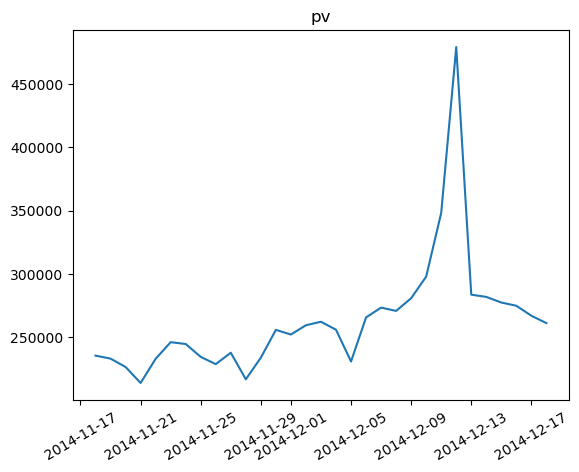

In [38]:
plt.plot(df.index,df.pv)
_ = plt.title('pv')
_ = plt.xticks(rotation=30)

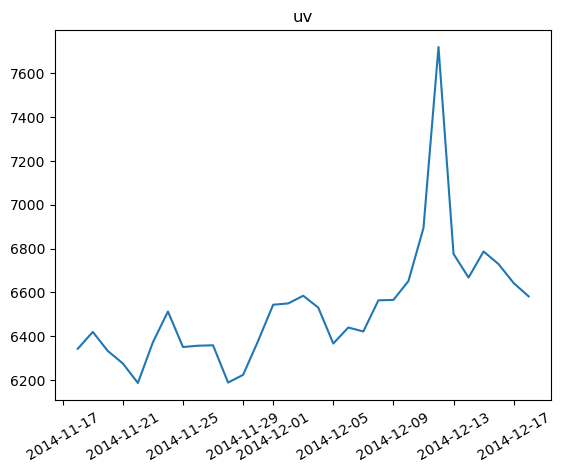

In [37]:
plt.plot(df.index,df.uv)
_ = plt.title('uv')
_ = plt.xticks(rotation=30)

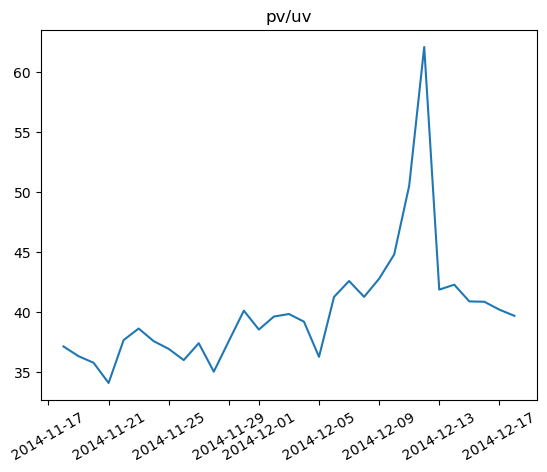

In [39]:
plt.plot(df.index,df['pv/uv'])
_ = plt.title('pv/uv')
_ = plt.xticks(rotation=30)

- 结论：在12月5日之前，活跃度在一定水平上波动。12月5日后，活跃度开始明显上升，并在双十二当天达到峰值。
- 可能原因：12月5日之后双十二预热活动开始，用户活跃度上升。

## 1212当天活跃度

In [40]:
#取出双12当天的数据
data_1212 = data.loc[data['date']=='2014-12-12']

In [41]:
#查看双12当天每小时的访问量
pv_hour_s = data_1212.groupby(by='hour')['user_id'].count()
#查看双12当天每小时的访客量
uv_hour_s = data_1212.groupby(by='hour')['user_id'].nunique()
#查看双12当天每小时的人均访问量
pv_uv_s = pv_hour_s / uv_hour_s

In [42]:
# merge
df = pd.concat((pv_hour_s,uv_hour_s,pv_uv_s),axis=1)
df.columns = ['pv_hour','uv_hour','pv/uv']
df.head()

,pv_hour,uv_hour,pv/uv
hour,,,
0,25075,1569,15.981517
1,11388,811,14.041924
2,5956,411,14.491484
3,3177,255,12.458824
4,2567,211,12.165877


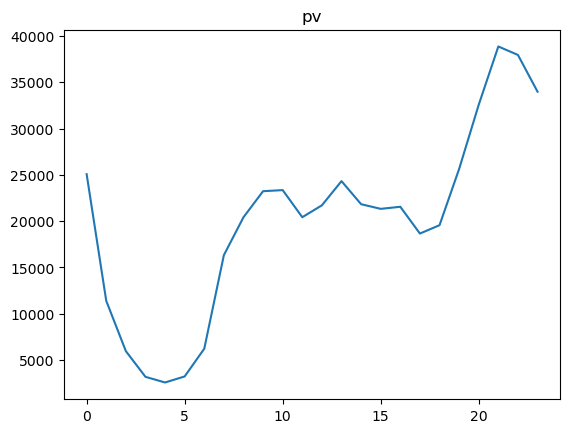

In [43]:
plt.plot(df.index,df.pv_hour)
a = plt.title('pv')

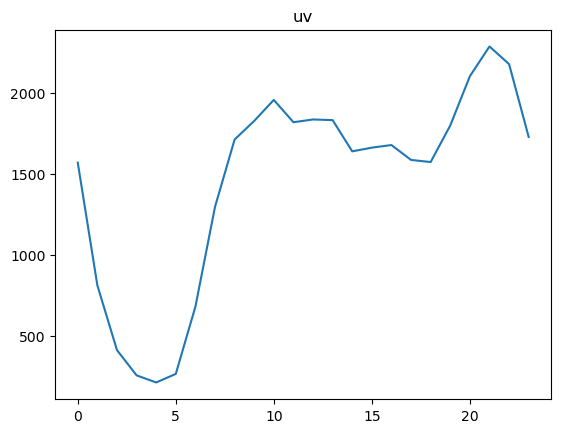

In [44]:
plt.plot(df.index,df.uv_hour)
a = plt.title('uv')

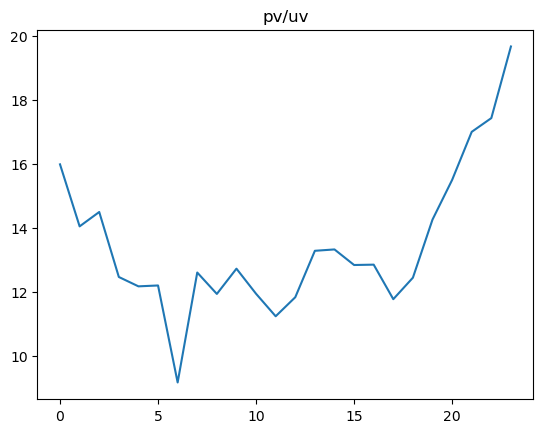

In [45]:
plt.plot(df.index,df['pv/uv'])
a = plt.title('pv/uv')

- 结论：双十二当天0点和18点之后淘宝用户活跃度较高，6点跌至最低点。
- 建议：商家可以在18点后设置优惠券或采取其他促销手段，吸引更多人消费，提高购买率。

## 用户行为分析

In [46]:
data.pivot_table(index='date',aggfunc='count').head(2)

,behavior_type,hour,item_category,item_id,user_id
date,,,,,
2014-11-18,235493,235493,235493,235493,235493
2014-11-19,233144,233144,233144,233144,233144


In [47]:
data.pivot_table(index='date',aggfunc='size').head(2)

date
2014-11-18    235493
2014-11-19    233144
dtype: int64

In [48]:
pv_df = data.pivot_table(index='date',columns='behavior_type',aggfunc='size',fill_value=0)
pv_df.head()

behavior_type,1,2,3,4
date,,,,
2014-11-18,215480,6797,9800,3416
2014-11-19,213108,7079,9607,3350
2014-11-20,206740,7063,9552,3168
2014-11-21,196121,6722,8328,2723
2014-11-22,213292,7001,9493,3208


In [50]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
import warnings
warnings.filterwarnings('ignore')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

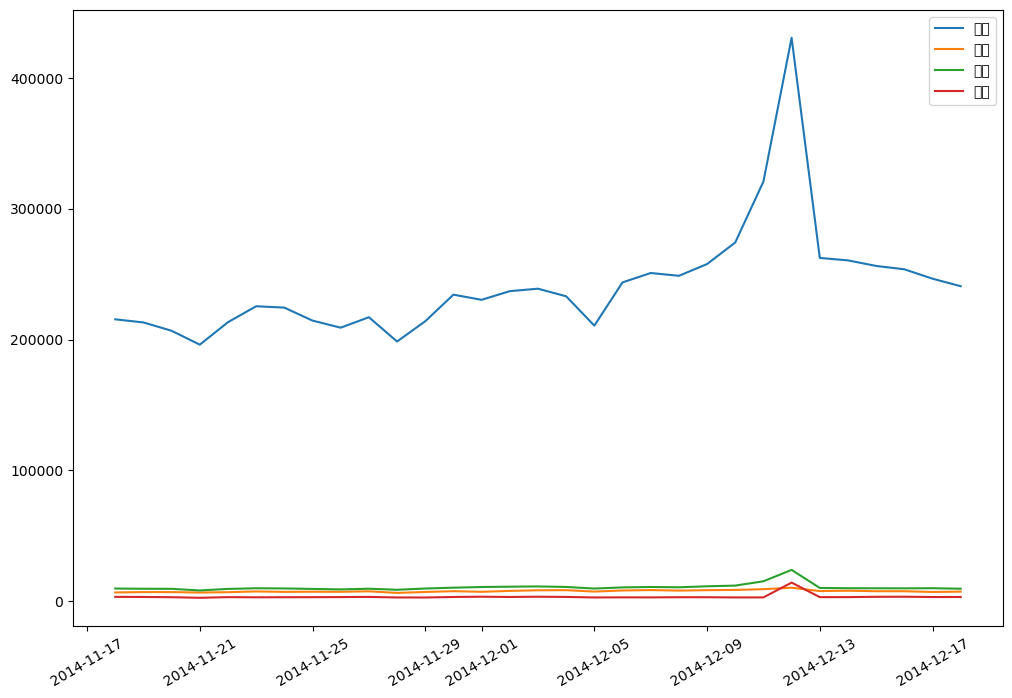

In [51]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=30)
plt.plot(pv_df.index,pv_df[1],label='点击')
plt.plot(pv_df.index,pv_df[2],label="收藏")
plt.plot(pv_df.index,pv_df[3],label='加购')
plt.plot(pv_df.index,pv_df[4],label='支付')
plt.legend()

结论：
- 点击、收藏、加购物车、支付这四种行为均在双十二当天达到顶峰。
- 只观察支付和收藏，发现双十二当天支付量大于收藏量。
- 支付量大于收藏量说明很多用户购买了目标之外的商品，可能是受到促销的影响冲动消费，又或者是为了凑单等。

## 留存率分析

In [53]:
#查看不同行为的访问量
s = data['behavior_type'].value_counts()
s.index = ['点击','收藏','加购物车','支付']
df = pd.DataFrame([s.index,s]).T
df.columns = ['用户行为','访问量']
df

,用户行为,访问量
0,点击,7479078
1,收藏,333371
2,加购物车,240919
3,支付,110672


In [54]:
#计算点击到收藏、收藏到加购，加购到支付的转化率
temp1 = df['访问量'][1:].values
temp2 = df['访问量'][0:-1].values
p = temp1 / temp2 * 100
p = list(p)
p.insert(0,100)
p

[100, 4.457380976639099, 72.26753376868413, 45.937431252827714]

In [55]:
df['单一环节转化率(%)'] = p
df

,用户行为,访问量,单一环节转化率(%)
0,点击,7479078,100.000000
1,收藏,333371,4.457381
2,加购物车,240919,72.267534
3,支付,110672,45.937431


In [56]:
#计算整体转化率
df['整体转化率(%)'] = df['访问量'] / df.iloc[0,1] * 100
df

,用户行为,访问量,单一环节转化率(%),整体转化率(%)
0,点击,7479078,100.000000,100.0
1,收藏,333371,4.457381,4.457381
2,加购物车,240919,72.267534,3.221239
3,支付,110672,45.937431,1.479755


In [57]:
#计算每一环节流失率(%)
df['每一环节流失率(%)'] = 100 - df['单一环节转化率(%)']
df

,用户行为,访问量,单一环节转化率(%),整体转化率(%),每一环节流失率(%)
0,点击,7479078,100.000000,100.0,0.000000
1,收藏,333371,4.457381,4.457381,95.542619
2,加购物车,240919,72.267534,3.221239,27.732466
3,支付,110672,45.937431,1.479755,54.062569


- 结论：用户的流失主要发生在点击-收藏环节。

- 可能原因及建议
    - 点击-收藏环节流失
        - 原因：用户被投放的广告吸引，进入后发现与预期严重不合，造成流失。
        - 建议：优化广告。
        - 原因：客户通过检索或推荐到列表页面但没找到合适的产品，造成流失。
        - 建议：更新搜索引擎和相关算法，尽可能精准推送相关内容。
        - 原因：如果商品的评价过低，造成流失。
        - 建议：商家要做进一步调查，分析用户对商品评价低的原因，进一步改进，提升用户的购物体验，最终可以口碑营销。
    - 收藏-加购物车环节流失
        - 此类用户有较强的购买需求。可以对用户进行精准推送促销信息，刺激用户完成购买。
    - 加购物车-支付环节流失
        - 原因：生成订单页面步骤过多。
        - 建议:
            - 优化购物流程，尽可能支持多种支付方式，如银行卡、微信支付、支付宝支付、花呗等。
            - 考虑目前到淘宝的购物流程已经很难再简化，需要商家进一步调查，了解用户放弃支付的原因，方便做出调整。

## 复购情况分析

(array([6.838e+03, 1.349e+03, 4.440e+02, 1.580e+02, 4.000e+01, 1.800e+01,
        2.200e+01, 4.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  16.38,  31.76,  47.14,  62.52,  77.9 ,  93.28, 108.66,
        124.04, 139.42, 154.8 , 170.18, 185.56, 200.94, 216.32, 231.7 ,
        247.08, 262.46, 277.84, 293.22, 308.6 , 323.98, 339.36, 354.74,
        370.12, 385.5 , 400.88, 416.26, 431.64, 447.02, 462.4 , 477.78,
        493.16, 508.54, 523.92, 539.3 , 554.68, 570.06, 585.44, 600.82,
        616.2 , 

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

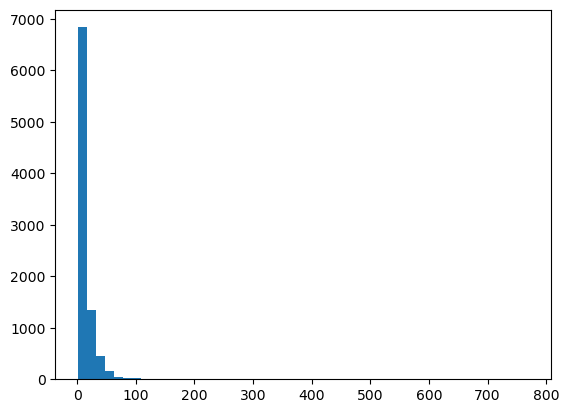

In [59]:
#用户购买次数直方图
buy_df = data.loc[data['behavior_type'] == 4]
user_buy_s = buy_df.groupby(by='user_id')['behavior_type'].count()
plt.hist(user_buy_s,bins=50)

In [60]:
#计算复购率=购买次数大于1的用户数量/有购买行为的用户总数
reBuy_rate = user_buy_s[user_buy_s > 1].count() / user_buy_s.count() * 100
reBuy_rate

91.44722034661264

- 结论：2014年11月18日至2014年12月18日这一个月用户复购率高达91.45%

## 用户价值分析

In [61]:
#将已购用户的数据单独取出
buy_df = data.loc[data['behavior_type'] == 4]
buy_df.head()

,user_id,item_id,behavior_type,item_category,date,hour
143,101260672,73008997,4,4076,2014-11-25,13
146,116730636,85319721,4,10079,2014-12-17,11
152,104811265,61764614,4,675,2014-12-01,13
177,106230218,238910858,4,12090,2014-12-03,11
198,100684618,271840783,4,12220,2014-11-23,18


In [62]:
#计算R：R表示客户最近一次交易时间的间隔
#/np.timedelta64(1,'D')去出days
now_date = buy_df['date'].max()
R = buy_df.groupby(by='user_id')['date'].apply(lambda x:now_date - x.max()) / np.timedelta64(1,'D')

In [63]:
#计算F：每个用户消费频率
F = buy_df.groupby(by='user_id')['date'].count()

In [64]:
rfm = pd.DataFrame(data=[R,F],index=['R','F']).T
rfm.head()

,R,F
user_id,,
4913,2.0,6.0
6118,1.0,1.0
7528,5.0,6.0
7591,5.0,21.0
12645,4.0,8.0


In [65]:
#将各维度分成两个程度
recent_avg = rfm['R'].mean()
freq_avg = rfm['F'].mean()
#R应该是越小越好，则R小于均值返回1，否则返回0
def rec_value(x):
    if x < recent_avg:
        return '1'
    else:
        return '0'
#F应该是越大越好，则F大于均值返回1，否则返回0   
def freq_value(x):
    if x > freq_avg:
        return '1'
    else:
        return '0'
rfm['R_value'] = rfm['R'].apply(rec_value)
rfm['F_value'] = rfm['F'].apply(freq_value)
#将R和F拼接到一起
rfm['rfm']=rfm['R_value'].str.cat(rfm['F_value'])
#根据R和F的拼接判定用户等级
def rfm_value(x):
    if x == '10':#购买间隔短，但是购买频率低
        return '重要发展客户'
    elif x == '01':#购买间隔长，但是购买频率高
        return '重要保持客户'
    elif x == '00':
        return '重要挽留客户'
    else:
        return '重要价值客户'
rfm['user_type'] = rfm['rfm'].apply(rfm_value)
rfm.head()

,R,F,R_value,F_value,rfm,user_type
user_id,,,,,,
4913,2.0,6.0,1,0,10,重要发展客户
6118,1.0,1.0,1,0,10,重要发展客户
7528,5.0,6.0,1,0,10,重要发展客户
7591,5.0,21.0,1,1,11,重要价值客户
12645,4.0,8.0,1,0,10,重要发展客户


In [66]:
#各类用户占比
user_type_count_s = rfm['user_type'].value_counts()
user_type_count_s / user_type_count_s.sum() * 100

user_type
重要挽留客户    34.233626
重要发展客户    33.400855
重要价值客户    27.143822
重要保持客户     5.221697
Name: count, dtype: float64

- 结论
- 重要挽留客户：占比最大，该类用户消费时间间隔较远，并且消费频次低。需要主动联系客户，调查清楚哪里出现了问题，可以通过短信，邮件，APP推送等唤醒客户，尽可能减少流失。
    - 重要发展客户：消费频次低，可以适当给点折扣或捆绑销售来增加用户的购买频率，尽可能提高留存率。
    - 重要价值客户：为重点用户，但用户比较少。可以针对性地给这类客户提供 VIP服务；
    - 重要保持客户：消费时间间隔较远，但是消费频次高。该类用户可能一次性购买很多东西。对于这类客户，需要主动联系，关注他们的购物习性做精准化营销，及时满足这类用户的需求。
